In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(1, '../src')
from utils.accuracy import *
from utils.dm_test import dm_test

In [12]:
def dm_table(y_hats, method_1, method_2, crit="MAPE"):
    firm_list = y_hats.index.get_level_values(0).unique()
    firm_list = list(firm_list)

    def dm_test_i(firm, crit=crit):
        firm_slice = y_hats.loc[pd.IndexSlice[firm, :, :], :]
        return dm_test(firm_slice["y_test"], firm_slice[method_1], firm_slice[method_2], h=1, crit=crit)

    dm_results = list(map(dm_test_i, firm_list))

    dm = pd.DataFrame(dm_results, index=firm_list)
    # ac_i = pd.read_csv("../assets/y_hats/accuracy_table_i.csv", index_col=[0, 1])
    # crit_i = ac_i.loc[pd.IndexSlice[:, crit], [method_1, method_2]]
    # crit_i.index = firm_list
    # dm = pd.concat([dm, crit_i], axis=1)
    def sig_level(x):
        sig_level = None
        if x <= 0.01:
            sig_level = "0.01"
        elif (0.01 < x) & (x <= 0.05):
            sig_level = "0.05"
        elif (0.05 < x) & (x <= 0.10):
            sig_level = "0.10"
        else:
            sig_level = "not stat sig"
        return sig_level
    dm["sig_level"] = dm["p_value"].apply(sig_level)
    return dm

In [13]:
def dm_stats_hist(method_1, method_2, y_hats, bins=35):
    dm_mape = dm_table(y_hats, method_1, method_2, crit="MAPE")

    # pivot and plot
    dm_mape.pivot(columns="sig_level", values="DM").plot.hist(bins=bins, figsize=(16, 9))
    plt.xlabel("DM score")
    plt.ylabel("firm count")
    plt.legend()
    plt.title("DM-test all firm results: (1) " + method_1 + " vs. (2) " + method_2)
    plt.show()

    p_1n = (dm_mape[dm_mape["p_value"] <= 0.010]["DM"] < 0).sum()
    p1_5n = (dm_mape[(dm_mape["p_value"] <= 0.05) & (dm_mape["p_value"] > 0.01)]["DM"] < 0).sum()
    p5_10n = (dm_mape[(dm_mape["p_value"] <= 0.10) & (dm_mape["p_value"] > 0.05)]["DM"] < 0).sum()
    p10_n = (dm_mape[dm_mape["p_value"] > 0.10]["DM"] < 0).sum()
    p10_p = (dm_mape[dm_mape["p_value"] > 0.10]["DM"] > 0).sum()
    p5_10p = (dm_mape[(dm_mape["p_value"] <= 0.10) & (dm_mape["p_value"] > 0.05)]["DM"] > 0).sum()
    p1_5p = (dm_mape[(dm_mape["p_value"] <= 0.05) & (dm_mape["p_value"] > 0.01)]["DM"] > 0).sum()
    p_1p = (dm_mape[dm_mape["p_value"] <= 0.010]["DM"] > 0).sum()
    print(p_1n, p1_5n, p5_10n, p10_n, "|", p10_p, p5_10p, p1_5p, p_1p)

In [119]:
a = pd.read_csv("../assets/y_hats/accuracy_table.csv", index_col=[0])
a

,Max_error,Max_percentage_error,MAE,MAPE,MSPE,MAPE-UB,MSPE-UB,Large_error_rate
y_test,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
y_hat_rw,1989.290000,5895.000000,38.745586,4.313953,7.001957e+03,0.584368,0.472665,0.322084
y_hat_sarima_br,17667.440089,88978.127205,38.468162,9.708298,6.068736e+05,0.526985,0.410689,0.265458
y_hat_sarima_f,3611.477871,2068.166620,34.881795,2.823022,1.142824e+03,0.526749,0.412805,0.272804
y_hat_sarima_g,3370.115229,34626.006762,39.410157,6.123384,9.347221e+04,0.534073,0.423401,0.286425
y_hat_srw,2685.300000,1946.000000,33.354025,2.703544,9.373206e+02,0.528642,0.415504,0.268212
y_hat_uen_i_tuned_simple,3306.700499,21034.826351,36.739557,4.397028,3.504721e+04,0.558134,0.433281,0.248393
y_hat_ul1_i_tuned_fine,2627.983935,21034.826090,35.578318,4.178091,3.474263e+04,0.561953,0.437136,0.245638
y_hat_ul1_i_tuned_simple,4322.802063,21034.826119,37.355628,4.471173,3.506335e+04,0.566506,0.442759,0.252984
y_hat_ul2_i_tuned_simple,6374.325185,21034.826089,44.109669,5.326721,3.547547e+04,0.548209,0.435076,0.293771


In [14]:
y_hats_all = pd.read_csv("../assets/y_hats/y_hats_all.csv", index_col=[0, 1, 2])
y_hats_all

y_test    y_hat_rw  y_hat_sarima_br  y_hat_sarima_f  \
企業名   会計年度 四半期                                                            
あらた   2018 Q1   105.420000   69.340000       122.565740      122.449521   
           Q2    90.440000  105.420000        79.897110       79.998967   
           Q3   106.240000   90.440000       119.386680      119.551232   
           Q4    99.220000  106.240000        60.222049       59.996949   
      2019 Q1   116.850000   99.220000       127.203963      125.133255   
...                    ...         ...              ...             ...   
ｅＢＡＳＥ 2019 Q4    18.657982    5.290000        51.406785       36.300485   
      2020 Q1     2.010000   18.657982       -68.232333       -0.020788   
           Q2     3.810000    2.010000        19.227708       11.637899   
           Q3     3.070000    3.810000      -317.707192        3.736002   
           Q4     9.989365    3.070000        34.835646       18.235485   

                y_hat_sarima_g   y_hat_srw  y_hat_uen_i_tuned_simple  \
企業名   会計年度 四半期                                                         
あらた   2018 Q1       130.595361  121.170000                 91.794110   
           Q2        94.544504   90.920000                 85.372422   
           Q3       119.287623  119.880000                 92.288894   
           Q4        65.424073   69.340000                 86.819024   
      2019 Q1       126.004465  105.420000                 96.812369   
...                        ...         ...                       ...   
ｅＢＡＳＥ 2019 Q4        88.758959   36.976728                133.635183   
      2020 Q1      -980.636406    3.090000                 51.945503   
           Q2      -201.877901   11.840000                 21.310432   
           Q3      -249.404402    5.290000                 20.893796   
           Q4        72.472296   18.657982                  6.097895   

                y_hat_ul1_i_tuned_fine  y_hat_ul1_i_tuned_simple  \
企業名   会計年度 四半期                                                     
あらた   2018 Q1                98.312871                114.921869   
           Q2                76.293889                 85.174564   
           Q3                99.606616                108.396646   
           Q4                88.694289                 93.029132   
      2019 Q1               101.638137                107.530710   
...                                ...                       ...   
ｅＢＡＳＥ 2019 Q4               133.635183                133.635183   
      2020 Q1                51.945503                 51.945503   
           Q2                21.310432                 21.310432   
           Q3                20.893796                 20.893796   
           Q4                 6.097895                  6.097895   

                y_hat_ul2_i_tuned_simple  ...  y_hat_ml1_i_tuned_fine  \
企業名   会計年度 四半期                            ...                           
あらた   2018 Q1                 126.523471  ...               89.482800   
           Q2                  91.008450  ...               76.491100   
           Q3                 117.662513  ...               92.710892   
           Q4                  95.430889  ...               69.778972   
      2019 Q1                 112.568429  ...              116.941313   
...                                  ...  ...                     ...   
ｅＢＡＳＥ 2019 Q4                 133.635183  ...               17.236412   
      2020 Q1                  51.945503  ...                2.407935   
           Q2                  21.310432  ...                3.639306   
           Q3                  20.893796  ...                2.639412   
           Q4                   6.097895  ...                8.391439   

                y_hat_ml1_i_tuned_simple  y_hat_ml2_i_tuned  \
企業名   会計年度 四半期                                                
あらた   2018 Q1                  89.690620          88.209630   
           Q2                  76.539459          67.550181   
           Q3       

In [15]:
dm_mape = dm_table(method_1="y_hat_rw", method_2="y_hat_sarima_f", y_hats=y_hats_all)
dm_mape

,DM,p_value,sig_level
あらた,1.770143,0.104377,not stat sig
いすゞ自動車,2.502193,0.029392,0.05
いなげや,1.099310,0.295110,not stat sig
かどや製油,1.332052,0.209783,not stat sig
きんでん,2.137582,0.055839,0.10
...,...,...,...
ＶＴホールディングス,0.307656,0.764091,not stat sig
ＷＤＢホールディングス,-0.484032,0.637856,not stat sig
ＷＯＷＯＷ,1.614221,0.134774,not stat sig
ＺＯＺＯ,0.945714,0.364605,not stat sig


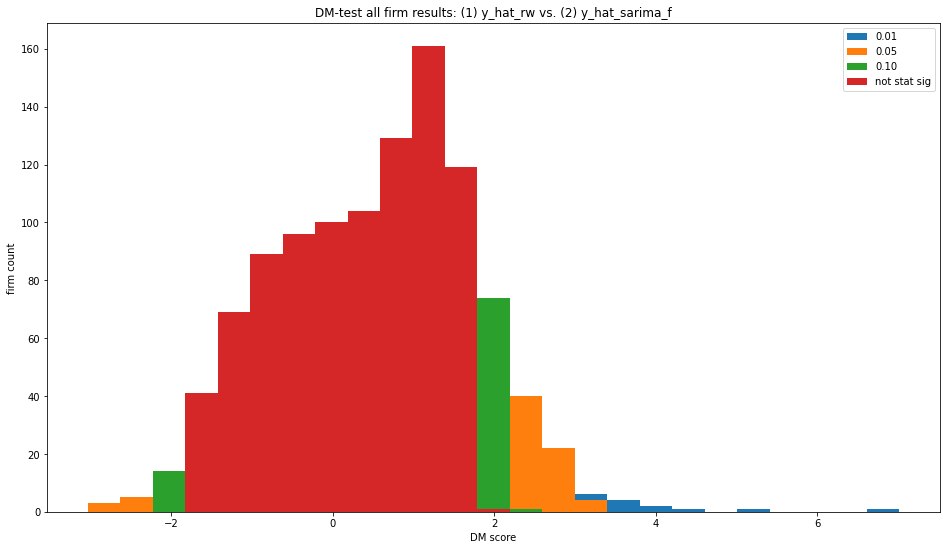

0 8 16 345 | 564 75 66 15


In [16]:
dm_stats_hist(method_1="y_hat_rw", method_2="y_hat_sarima_f", y_hats=y_hats_all, bins=25)

In [109]:
def dm_integrated_table(method_1, m2_list, y_hats):
    # Create Table
    dm_test_p = pd.DataFrame()
    l = []
    for i in m2_list:
        method_2 = i
        pair = "(1) " + method_1 + " vs " + "(2) " + method_2

        # DM score for each firm
        dm_mape = dm_table(method_1=method_1, method_2=method_2, y_hats=y_hats)
        dm_mape["pair"] = pair
        dm_test_p = pd.concat([dm_test_p, dm_mape])

        # count firm for each statistic significance level
        p_1n = (dm_mape[dm_mape["p_value"] <= 0.010]["DM"] < 0).sum()
        p_5n = (dm_mape[dm_mape["p_value"] <= 0.050]["DM"] < 0).sum()
        p_10n = (dm_mape[dm_mape["p_value"] <= 0.100]["DM"] < 0).sum()
        # p_n = (dm_mape[dm_mape["p_value"] > 0.10]["DM"] < 0).sum()
        # p_p = (dm_mape[dm_mape["p_value"] > 0.10]["DM"] > 0).sum()
        p_10p = (dm_mape[dm_mape["p_value"] <= 0.100]["DM"] > 0).sum()
        p_5p = (dm_mape[dm_mape["p_value"] <= 0.050]["DM"] > 0).sum()
        p_1p = (dm_mape[dm_mape["p_value"] <= 0.010]["DM"] > 0).sum()
        # print(p_1n, p_5n, p_10n, p_n, "|", p_p, p_10p, p_5p, p_1p)
        # print(p_1n, p_5n, p_10n, "|", p_10p, p_5p, p_1p)
        l.append([pair, p_1n, p_5n, p_10n, p_10p, p_5p, p_1p])

    dm_test_p = dm_test_p.reset_index().set_index(["pair", "index"])

    dm_test_p_count = pd.DataFrame(l, columns=["pair", "p_1n", "p_5n", "p_10n", "p_10p", "p_5p", "p_1p"])
    dm_test_p_count = dm_test_p_count.set_index(["pair"])

    return dm_test_p, dm_test_p_count

In [142]:
# m1 = "y_hat_rw"
# m1 = "y_hat_sarima_f"
m1 = "y_hat_ml1_i_tuned_simple"
dm_test_p, dm_test_p_count = dm_integrated_table(m1, y_hats_all.columns, y_hats_all)
dm_test_p.to_csv("../assets/DM_test_result/dm_test_p_" + m1 + ".csv")
dm_test_p_count.to_csv("../assets/DM_test_result/dm_test_p_count_" + m1 + ".csv")

/mnt/d/0ngoing/thesis/repo/notebooks/../src/utils/dm_test.py:169: RuntimeWarning: divide by zero encountered in double_scalars
  DM_stat=V_d**(-0.5)*mean_d
/mnt/d/0ngoing/thesis/repo/notebooks/../src/utils/dm_test.py:169: RuntimeWarning: invalid value encountered in double_scalars
  DM_stat=V_d**(-0.5)*mean_d


In [131]:
# dm_test_p

In [132]:
# dm_test_p_count

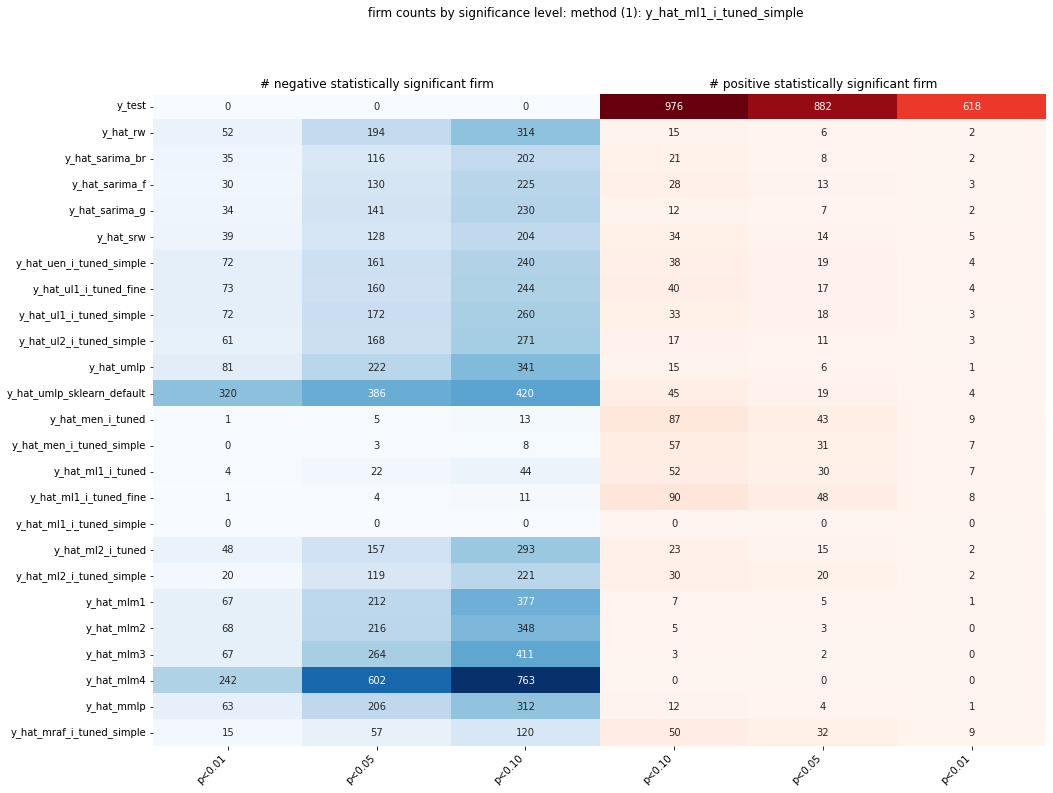

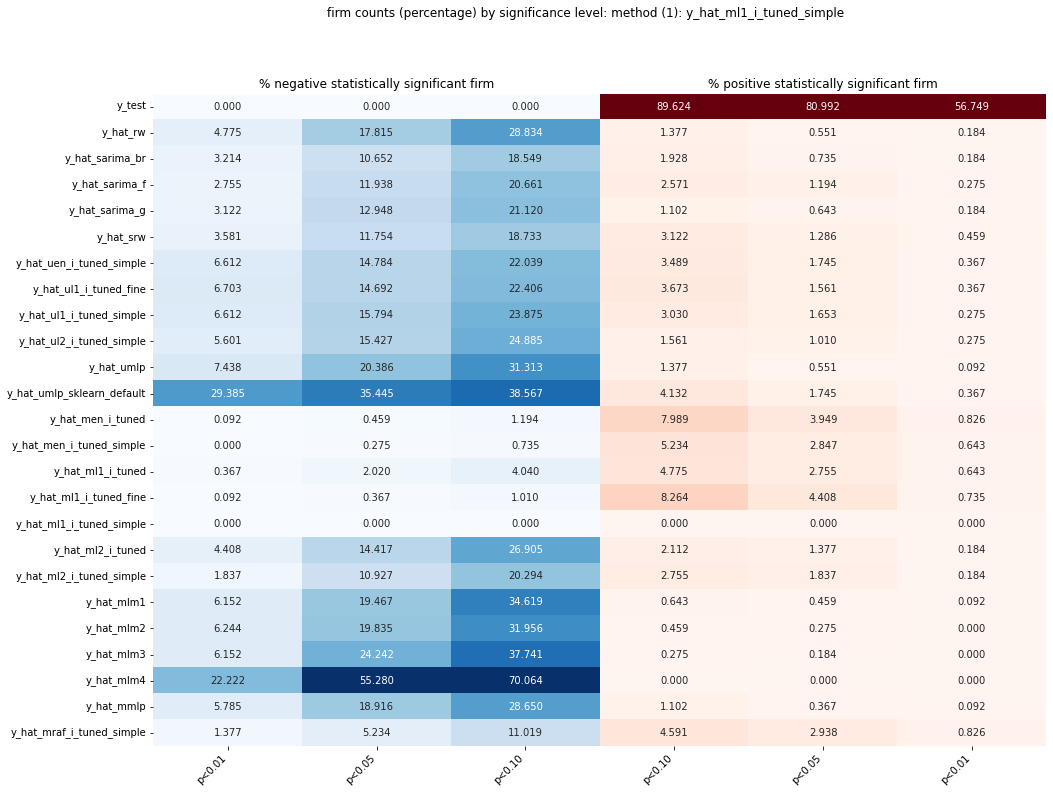

In [145]:
# plot count heatmap 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))#, dpi=300)

sns.heatmap(dm_test_p_count[["p_1n", "p_5n", "p_10n"]].values, cmap='Blues', ax=axs[0], vmax=None, vmin=None, annot=True, fmt="d", cbar=False, cbar_kws={})
sns.heatmap(dm_test_p_count[["p_10p", "p_5p", "p_1p"]].values, cmap='Reds', ax=axs[1], vmax=None, vmin=None, annot=True, fmt="d", cbar=False, yticklabels=False)

fig.suptitle("firm counts by significance level: method (1): " + m1)
axs[0].set_title("# negative statistically significant firm")
axs[0].set_xticklabels(labels=["p<0.01", "p<0.05", "p<0.10"], rotation=45, ha='right')
axs[1].set_title("# positive statistically significant firm")
axs[1].set_xticklabels(labels=["p<0.10", "p<0.05", "p<0.01"], rotation=45, ha='right')

yticks = [x.split()[-1] for x in dm_test_p_count.index]
axs[0].set_yticklabels(labels=yticks, rotation=0, ha='right')

fig.subplots_adjust(wspace=0, hspace=0)

plt.show()

# plot count (percentage) heatmap 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))#, dpi=300)

sns.heatmap((dm_test_p_count[["p_1n", "p_5n", "p_10n"]].values/1089) * 100, cmap='Blues', ax=axs[0], vmax=50, vmin=0, annot=True, fmt=".3f", cbar=False, cbar_kws={})
sns.heatmap((dm_test_p_count[["p_10p", "p_5p", "p_1p"]].values/1089) * 100, cmap='Reds', ax=axs[1], vmax=50, vmin=0, annot=True, fmt=".3f", cbar=False, yticklabels=False)

fig.suptitle("firm counts (percentage) by significance level: method (1): " + m1)
axs[0].set_title("% negative statistically significant firm")
axs[0].set_xticklabels(labels=["p<0.01", "p<0.05", "p<0.10"], rotation=45, ha='right')
axs[1].set_title("% positive statistically significant firm")
axs[1].set_xticklabels(labels=["p<0.10", "p<0.05", "p<0.01"], rotation=45, ha='right')

yticks = [x.split()[-1] for x in dm_test_p_count.index]
axs[0].set_yticklabels(labels=yticks, rotation=0, ha='right')

fig.subplots_adjust(wspace=0, hspace=0)

plt.show()

# IBES

In [31]:
a_ibes = pd.read_csv("../assets/y_hats/accuracy_table_vsibes.csv", index_col=[0])
a_ibes

,Max_error,Max_percentage_error,MAE,MAPE,MSPE,MAPE-UB,MSPE-UB,Large_error_rate
y_test,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
y_hat_rw,746.770000,154.375000,43.511786,1.726186,47.777831,0.528255,0.410651,0.265993
y_hat_sarima_br,610.800235,226.120325,37.484990,1.623581,74.896687,0.489796,0.373225,0.232323
y_hat_sarima_f,665.312362,203.446576,39.842215,1.826958,82.120902,0.492539,0.379911,0.251684
y_hat_sarima_g,535.510149,278.567590,40.819271,2.317916,147.950881,0.510169,0.398237,0.270202
y_hat_srw,754.500000,136.692810,41.220706,1.698827,55.318537,0.503839,0.391375,0.265152
y_hat_uen_i_tuned_simple,630.692138,463.766149,36.195482,1.544708,194.262960,0.504188,0.377314,0.228956
y_hat_ul1_i_tuned_fine,651.257155,463.766149,37.498871,1.535367,194.148492,0.512630,0.386324,0.235690
y_hat_ul1_i_tuned_simple,630.692138,463.766149,36.586394,1.572988,194.596871,0.509742,0.383243,0.235690
y_hat_ul2_i_tuned_simple,729.792628,508.282636,39.960469,1.864996,238.405886,0.508460,0.390956,0.260101


In [32]:
y_hats_all_vsibes = pd.read_csv("../assets/y_hats/y_hats_all_vsibes.csv", index_col=[0, 1, 2])
y_hats_all_vsibes

y_test  y_hat_rw  y_hat_sarima_br  y_hat_sarima_f  \
企業名    会計年度 四半期                                                         
いすゞ自動車 2018 Q1   48.380000     27.74        33.194516       39.930566   
            Q2   24.150000     48.38        28.366444       28.002100   
            Q3   50.860000     24.15        38.824756       39.095560   
            Q4   26.430000     50.86        36.040824       32.019464   
       2019 Q1   37.130000     26.43        43.788193       47.922773   
...                    ...       ...              ...             ...   
ＴＯＷＡ   2019 Q4   11.580000     11.21        20.687856       25.432088   
       2020 Q1    8.260000     11.58         6.524577      -20.795096   
            Q2   27.300000      8.26        22.013448       23.338850   
            Q3   35.290000     27.30        12.649111       18.455527   
            Q4   35.707105     35.29        29.574206       23.366923   

                 y_hat_sarima_g  y_hat_srw  y_hat_uen_i_tuned_simple  \
企業名    会計年度 四半期                                                        
いすゞ自動車 2018 Q1        36.294894      41.69                 22.903221   
            Q2        29.226981      25.17                 23.555935   
            Q3        41.291053      39.57                 25.425477   
            Q4        41.555242      27.74                 25.164969   
       2019 Q1        47.508122      48.38                 28.102749   
...                         ...        ...                       ...   
ＴＯＷＡ   2019 Q4         6.516588      13.47                 20.743279   
       2020 Q1         1.010510     -19.92                 16.115858   
            Q2        16.411733      11.87                 13.583803   
            Q3        10.216570      11.21                 18.402950   
            Q4        32.204562      11.58                 25.663370   

                 y_hat_ul1_i_tuned_fine  y_hat_ul1_i_tuned_simple  \
企業名    会計年度 四半期                                                     
いすゞ自動車 2018 Q1                23.324188                 22.903221   
            Q2                23.810511                 23.555935   
            Q3                25.957894                 25.425477   
            Q4                25.388324                 25.164969   
       2019 Q1                29.002929                 28.102749   
...                                 ...                       ...   
ＴＯＷＡ   2019 Q4                21.006705                 23.975295   
       2020 Q1                14.332306                 15.551147   
            Q2                13.339100                 13.142713   
            Q3                18.487683                 19.186618   
            Q4                25.956536                 28.777520   

                 y_hat_ul2_i_tuned_simple  ...  y_hat_ml1_i_tuned_fine  \
企業名    会計年度 四半期                            ...                           
いすゞ自動車 2018 Q1                  32.399487  ...               35.984325   
            Q2                  33.581439  ...               34.213326   
            Q3                  34.983208  ...               47.142284   
            Q4                  31.301852  ...               33.838647   
       2019 Q1                  44.562692  ...               43.197250   
...                                   ...  ...                     ...   
ＴＯＷＡ   2019 Q4                  23.986382  ...                7.291462   
       2020 Q1                  16.485428  ...                3.252910   
            Q2                  13.276477  ...               12.747072   
            Q3                  19.310222  ...               32.623504   
            Q4                  28.977377  ...               33.059699   

                 y_hat_ml1_i_tuned_simple  y_hat_ml2_i_tuned_simple  \
企業名    会計年度 四半期                                                       
いすゞ自動車 2018 Q1                  34.756859                 35.197180   
            Q2                  34.935023                 2

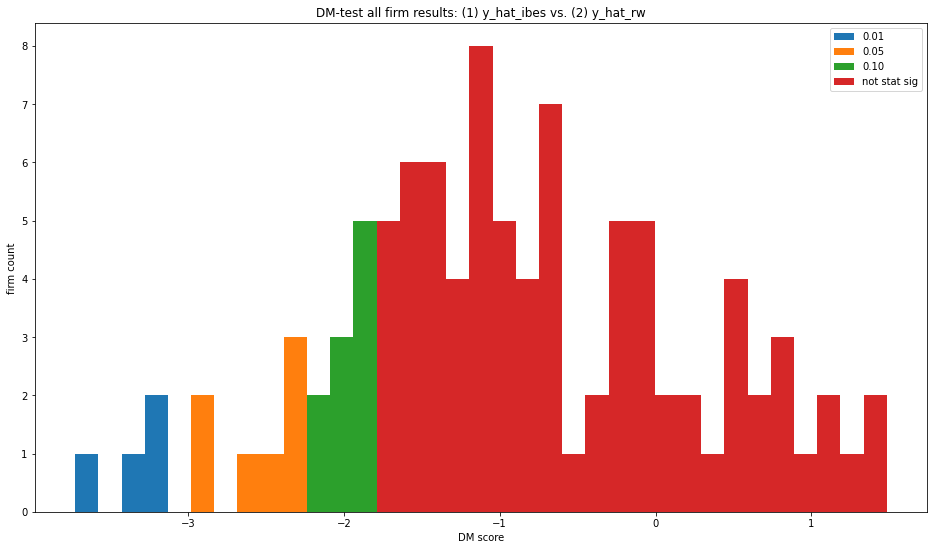

4 7 10 58 | 20 0 0 0


In [147]:
dm_stats_hist(method_2="y_hat_rw", method_1="y_hat_ibes", y_hats=y_hats_all_vsibes)

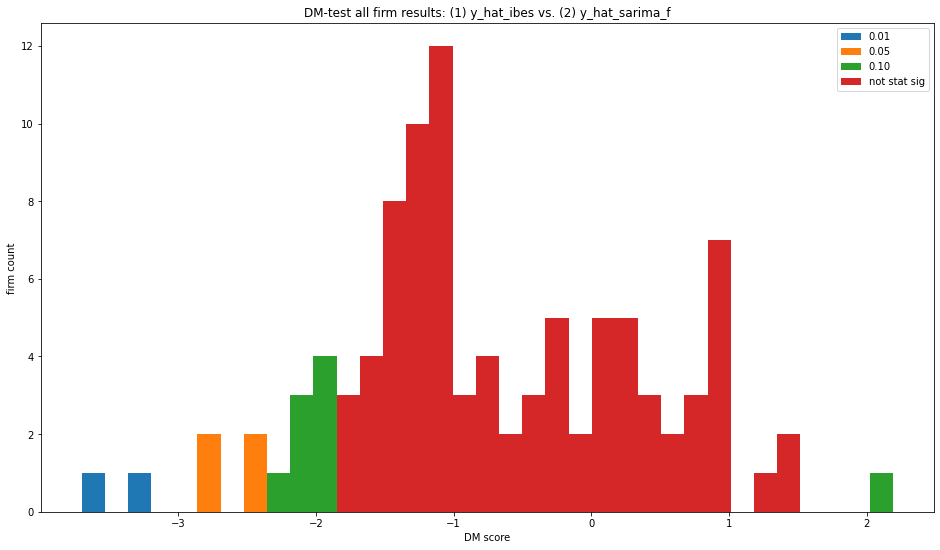

2 4 8 55 | 29 1 0 0


In [148]:
dm_stats_hist(method_2="y_hat_sarima_f", method_1="y_hat_ibes", y_hats=y_hats_all_vsibes)

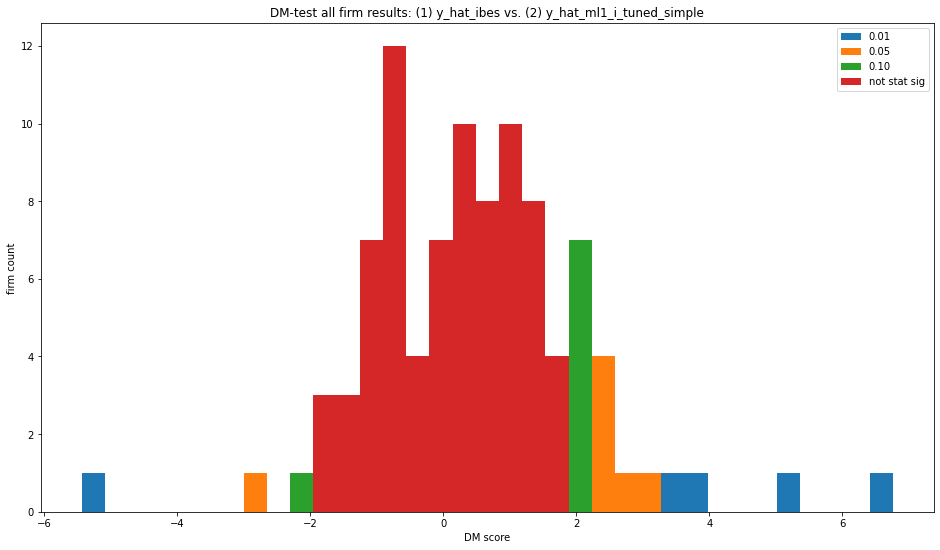

1 2 1 34 | 42 9 6 4


In [149]:
dm_stats_hist(method_2="y_hat_ml1_i_tuned_simple", method_1="y_hat_ibes", y_hats=y_hats_all_vsibes)

In [134]:
m1 = "y_hat_ibes"
dm_test_p_ibes, dm_test_p_count_ibes = dm_integrated_table(m1, y_hats_all_vsibes.columns, y_hats_all_vsibes)
dm_test_p_ibes.to_csv("../assets/DM_test_result/dm_test_p_vsibes_" + m1 + ".csv")
dm_test_p_count_ibes.to_csv("../assets/DM_test_result/dm_test_p_count_vsibes_" + m1 + ".csv")

/mnt/d/0ngoing/thesis/repo/notebooks/../src/utils/dm_test.py:169: RuntimeWarning: divide by zero encountered in double_scalars
  DM_stat=V_d**(-0.5)*mean_d
/mnt/d/0ngoing/thesis/repo/notebooks/../src/utils/dm_test.py:169: RuntimeWarning: invalid value encountered in double_scalars
  DM_stat=V_d**(-0.5)*mean_d


In [136]:
# dm_test_p_vsibes

In [138]:
# dm_test_p_count_vsibes

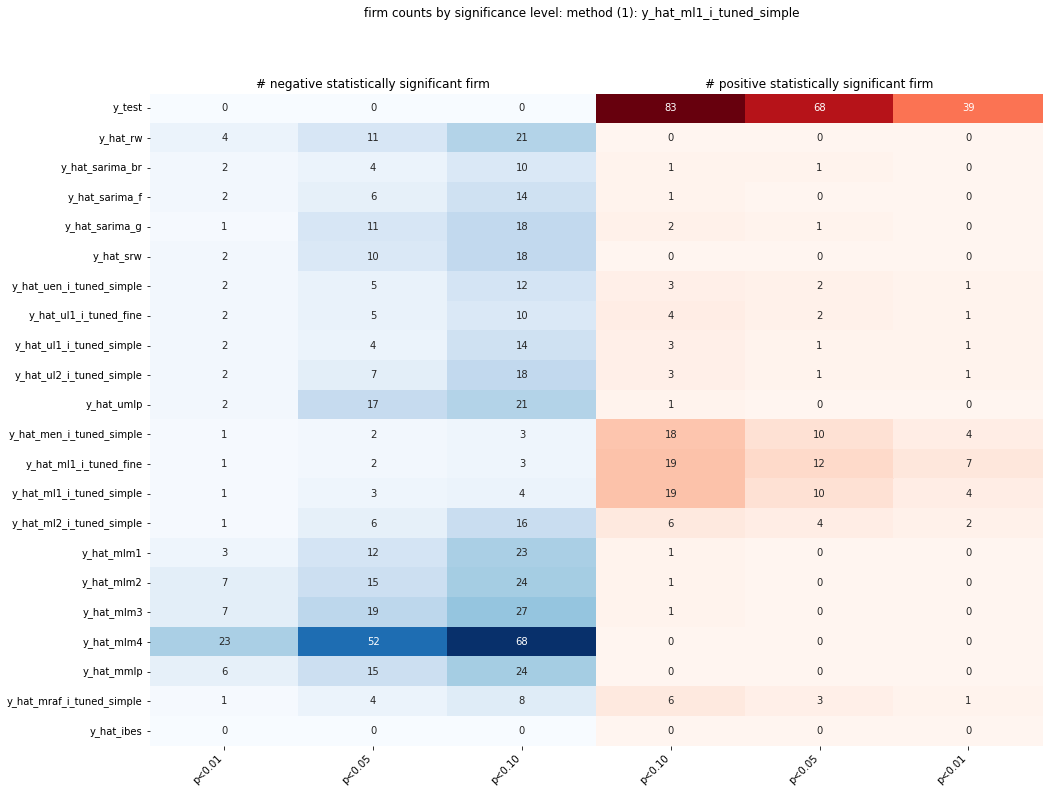

In [146]:
# plot count heatmap 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))#, dpi=300)

sns.heatmap(dm_test_p_count_ibes[["p_1n", "p_5n", "p_10n"]].values, cmap='Blues', ax=axs[0], vmax=None, vmin=None, annot=True, fmt="d", cbar=False, cbar_kws={})
sns.heatmap(dm_test_p_count_ibes[["p_10p", "p_5p", "p_1p"]].values, cmap='Reds', ax=axs[1], vmax=None, vmin=None, annot=True, fmt="d", cbar=False, yticklabels=False)

fig.suptitle("firm counts by significance level: method (1): " + m1)
axs[0].set_title("# negative statistically significant firm")
axs[0].set_xticklabels(labels=["p<0.01", "p<0.05", "p<0.10"], rotation=45, ha='right')
axs[1].set_title("# positive statistically significant firm")
axs[1].set_xticklabels(labels=["p<0.10", "p<0.05", "p<0.01"], rotation=45, ha='right')

yticks = [x.split()[-1] for x in dm_test_p_count_ibes.index]
axs[0].set_yticklabels(labels=yticks, rotation=0, ha='right')

fig.subplots_adjust(wspace=0, hspace=0)

plt.show()

# Time Series Plot

検定的にはIBESよりもLasso, ENが勝ってる企業が多い

In [155]:
# IBESのMAPEがLASSOよりも統計的有意に大きいような企業
dm_test_p_ibes.loc["(1) y_hat_ibes vs (2) y_hat_ml1_i_tuned_simple"][(dm_test_p_ibes.loc["(1) y_hat_ibes vs (2) y_hat_ml1_i_tuned_simple"]["DM"] > 0) & (dm_test_p_ibes.loc["(1) y_hat_ibes vs (2) y_hat_ml1_i_tuned_simple"]["p_value"] < 0.1)]

,DM,p_value,sig_level
index,,,
アドバンテスト,3.616128,0.004054,0.01
アルプスアルパイン,2.077402,0.061976,0.10
エフピコ,5.326275,0.000242,0.01
カプコン,6.764345,0.000031,0.01
キーエンス,2.757053,0.018654,0.05
スクウェア・エニックス・ホール,1.831957,0.094147,0.10
ダイキン工業,1.974858,0.073916,0.10
ディスコ,2.935041,0.013568,0.05
トヨタ紡織,2.237281,0.046924,0.05


アドバンテスト


[]

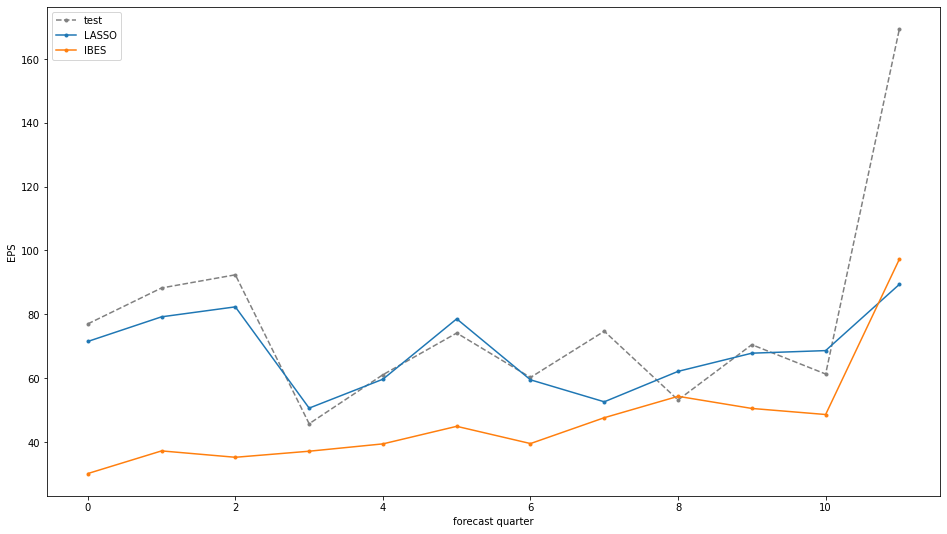

In [162]:
plot_firm = "アドバンテスト"
print(plot_firm)
plt.figure(figsize=(16, 9))
plt.plot(y_hats_all_vsibes.loc[plot_firm]["y_test"].values, marker=".", color="gray", linestyle="--", label="test")

method_1 = "y_hat_ml1_i_tuned_simple"
plt.plot(y_hats_all_vsibes.loc[plot_firm][method_1].values, marker=".", label="LASSO")

method_2 = "y_hat_ibes"
plt.plot(y_hats_all_vsibes.loc[plot_firm][method_2].values, marker=".", label="IBES")

plt.xlabel("forecast quarter")
plt.ylabel("EPS")
plt.legend()
plt.plot()

In [159]:
# IBESのMAPEがLASSOよりも統計的有意に小さいような企業
dm_test_p_ibes.loc["(1) y_hat_ibes vs (2) y_hat_ml1_i_tuned_simple"][(dm_test_p_ibes.loc["(1) y_hat_ibes vs (2) y_hat_ml1_i_tuned_simple"]["DM"] < 0) & (dm_test_p_ibes.loc["(1) y_hat_ibes vs (2) y_hat_ml1_i_tuned_simple"]["p_value"] < 0.1)]

,DM,p_value,sig_level
index,,,
パナソニック,-5.433443,0.000206,0.01
マツダ,-2.837210,0.016162,0.05
日本製鉄,-2.167842,0.052976,0.10
東京製鉄,-2.210544,0.049172,0.05


パナソニック


[]

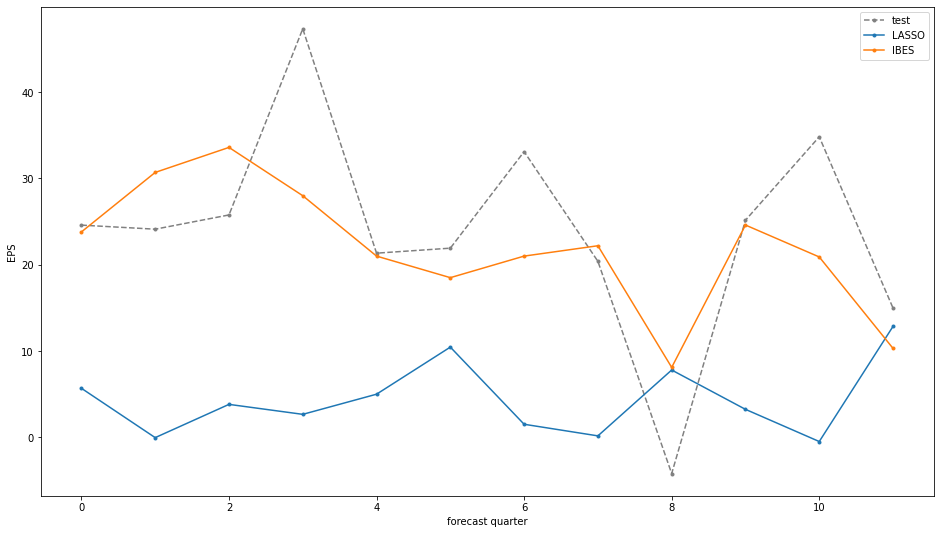

In [163]:
plot_firm = "パナソニック"
print(plot_firm)
plt.figure(figsize=(16, 9))
plt.plot(y_hats_all_vsibes.loc[plot_firm]["y_test"].values, marker=".", color="gray", linestyle="--", label="test")

method_1 = "y_hat_ml1_i_tuned_simple"
plt.plot(y_hats_all_vsibes.loc[plot_firm][method_1].values, marker=".", label="LASSO")

method_2 = "y_hat_ibes"
plt.plot(y_hats_all_vsibes.loc[plot_firm][method_2].values, marker=".", label="IBES")

plt.xlabel("forecast quarter")
plt.ylabel("EPS")
plt.legend()
plt.plot()